# Fetch the Dataset from Kaggle to Colab Working Directory

**Dataset source:** <br>
https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
<br>
<br>

**Dataset overview:** <br>
Summary of RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song) Dataset:

1. Type of Data:
   - Audio files in WAV format.
   - Speech audio-only files (16bit, 48kHz .wav).

2. Structure of the Data:
   - 1440 files organized into 60 trials per actor, with 24 actors (12 female, 12 male).
   - Each actor vocalizes two lexically-matched statements in a neutral North American accent.
   - Speech emotions include calm, happy, sad, angry, fearful, surprise, and disgust expressions.
   - Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.
   - Follows a specific file naming convention with a 7-part numerical identifier.

3. File Naming Convention:
   - Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
   - Vocal channel (01 = speech, 02 = song).
   - Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
   - Emotional intensity (01 = normal, 02 = strong). Note: No strong intensity for the 'neutral' emotion.
   - Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
   - Repetition (01 = 1st repetition, 02 = 2nd repetition).
   - Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

4. Task of the Data:
   - Designed for tasks related to emotion recognition in speech.
   - Tasks may include classifying emotions such as calm, happy, sad, angry, fearful, surprise, and disgust, along with variations in intensity.
   - Suitable for training and evaluating models in the field of audio-based emotion recognition.


In [1]:
from google.colab import files

print(f"{'*'*27}\n* Upload Kaggle.json file *\n{'*'*27}")
kaggle_json = files.upload()

***************************
* Upload Kaggle.json file *
***************************


Saving kaggle.json to kaggle.json


In [2]:
%%capture
!pip install opendatasets

In [3]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio'
od.download(dataset_url)

100%|██████████| 429M/429M [00:03<00:00, 128MB/s]


# Import Necessary Libraries

In [4]:
# Libraries for data manipulation and analysis
import pandas as pd  # Pandas for handling structured\tabular data
import numpy as np   # NumPy for numerical operations

# Visualization libraries
import matplotlib.pylab as plt  # Matplotlib for basic plotting
import seaborn as sns           # Seaborn for statistical data visualization

# File handling
from glob import glob  # Glob for finding pathnames according to a pattern

# Audio processing libraries
import librosa                 # Librosa for audio analysis
import librosa.display         # Librosa's display module for visualizing audio data
import IPython.display as ipd  # IPython for interactive display

# Iteration handling
from itertools import cycle  # Cycle for cycling through colors in plots

# Set Seaborn theme and color palette
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]           # Access default color palette
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])  # Cycle through colors in plots

# Theory \ Basic Terminology

Frequency (Hz) <br>
- Frequency describes the differences of wave lengths.
- We interperate frequency has high and low pitches.
    - High-frequency sounds are characterized by a higher pitch, indicating that the associated sound waves have a greater number of cycles per second.
    - Conversely, low-frequency sounds in speech exhibit a lower pitch, reflecting sound waves with fewer cycles per second.

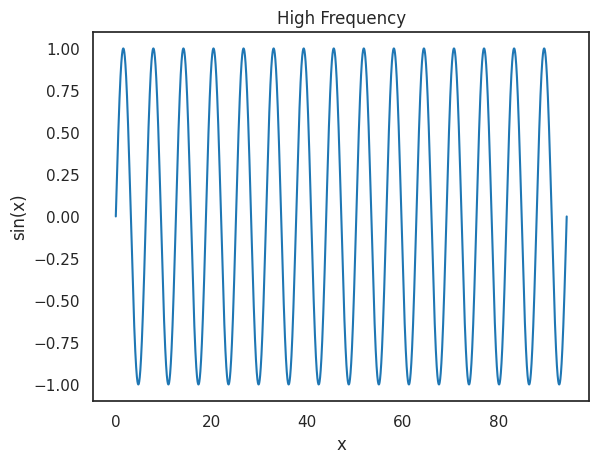

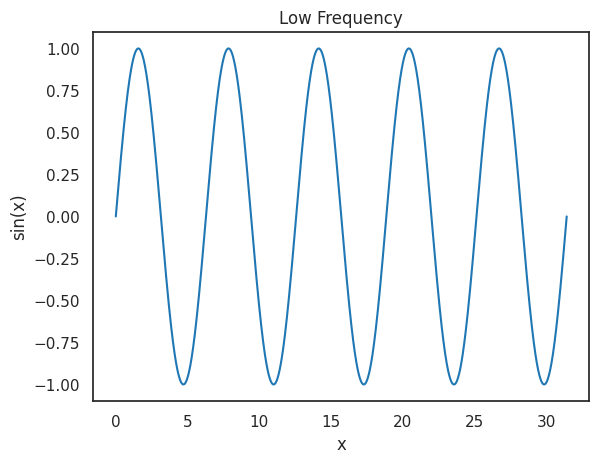

In [5]:
# Generate data points for one cycle of the sine wave
x_single_cycle = np.linspace(0, 2 * np.pi, 1000)

# Repeat the sine wave to create a long wave
num_repeats = 15  # Adjust the number of repeats
x_long_wave = np.linspace(0, 2 * np.pi * num_repeats, 1000 * num_repeats)

# Generate y-values for the long sine wave
y_long_wave = np.sin(x_long_wave)

# Plot the long sine wave
plt.plot(x_long_wave, y_long_wave)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title("High Frequency")

# Display the plot
plt.show()

# --------------------------------------------------------

# Repeat the sine wave to create a long wave
num_repeats = 5  # Adjust the number of repeats
x_long_wave = np.linspace(0, 2 * np.pi * num_repeats, 1000 * num_repeats)

# Generate y-values for the long sine wave
y_long_wave = np.sin(x_long_wave)

# Plot the long sine wave
plt.plot(x_long_wave, y_long_wave)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title("Low Frequency")

# Display the plot
plt.show()

Intensity (db) <br>
- Intensity describes the amplitude (height) of the wave.
- Higher intensity indicates louder sounds, while lower intensity corresponds to softer sounds.
    - Changes in intensity increases/decreases loudness/softness of speech sound, but not in frequency of the speech signal.
    - Changes in the frequency modifiess pitch, but not in intensity.
        * Pitch refers to the perceived frequency of a sound, influencing our perception of whether a sound is high or low in tone.
        * High pitch -> High frequency <br> Low pitch -> Low Frequency
        * Difference between High and Low pitch: https://www.youtube.com/shorts/jdEaYV5Kq98

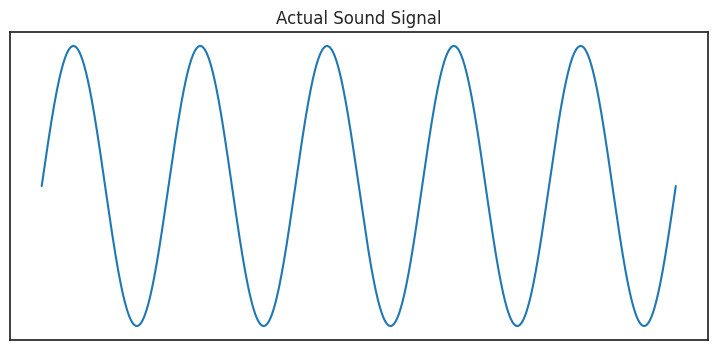

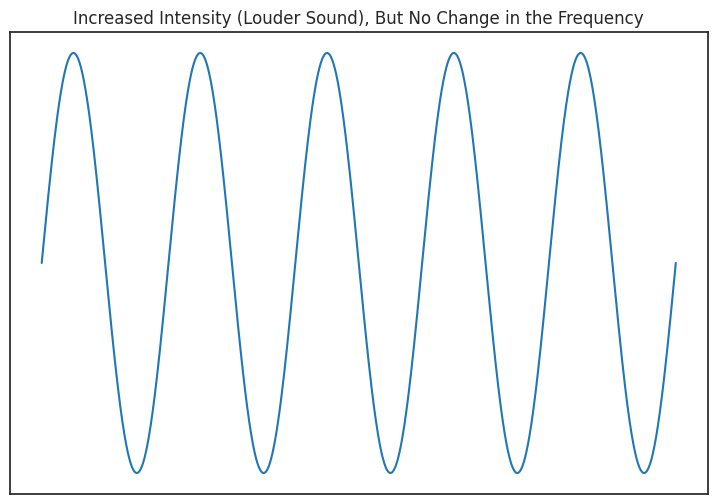

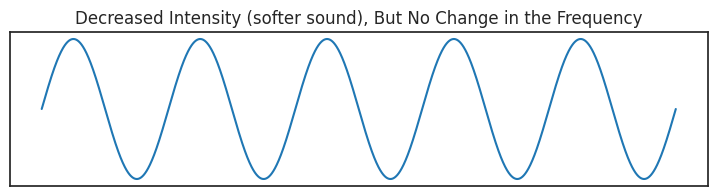

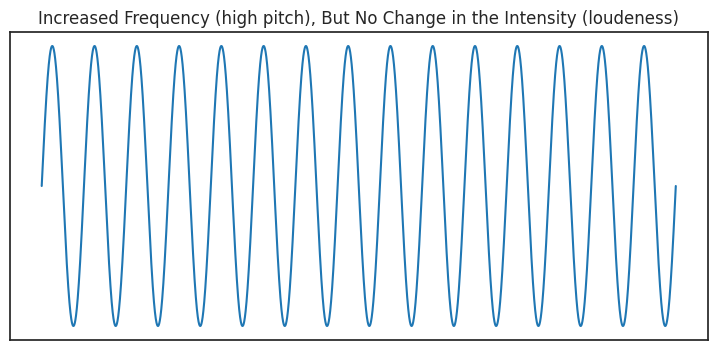

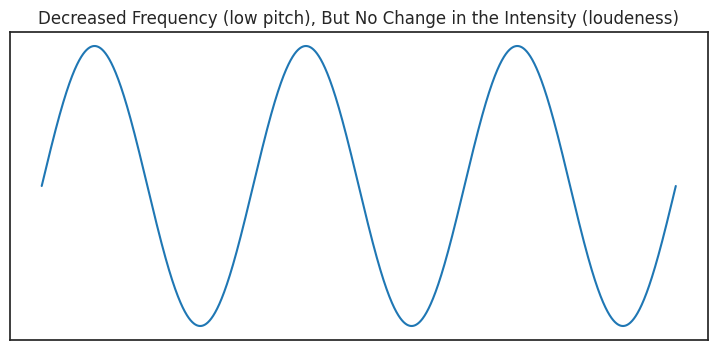

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Repeat the sine wave to create a long wave
num_repeats = 5  # Adjust the number of repeats
x_long_wave = np.linspace(0, 2 * np.pi * num_repeats, 1000 * num_repeats)

# Generate y-values for the long sine wave
y_long_wave = np.sin(x_long_wave)

# Plot the long sine wave without showing numbers on x and y labels
plt.figure(figsize=(9, 4))
plt.plot(x_long_wave, y_long_wave)
plt.title("Actual Sound Signal")
plt.xticks([])  # Remove numbers from the x-axis
plt.yticks([])  # Remove numbers from the y-axis
# Display the plot
plt.show()


# Plot the long sine wave without showing numbers on x and y labels
plt.figure(figsize=(9, 6))
plt.plot(x_long_wave, y_long_wave)
plt.title("Increased Intensity (Louder Sound), But No Change in the Frequency")
plt.xticks([])  # Remove numbers from the x-axis
plt.yticks([])  # Remove numbers from the y-axis
# Display the plot
plt.show()


# Plot the long sine wave without showing numbers on x and y labels
plt.figure(figsize=(9, 2))
plt.plot(x_long_wave, y_long_wave)
plt.title("Decreased Intensity (softer sound), But No Change in the Frequency")
plt.xticks([])  # Remove numbers from the x-axis
plt.yticks([])  # Remove numbers from the y-axis
# Display the plot
plt.show()


# Repeat the sine wave to create a long wave
num_repeats = 15  # Adjust the number of repeats
x_long_wave = np.linspace(0, 2 * np.pi * num_repeats, 1000 * num_repeats)
# Generate y-values for the long sine wave
y_long_wave = np.sin(x_long_wave)
# Plot the long sine wave without showing numbers on x and y labels
plt.figure(figsize=(9, 4))
plt.plot(x_long_wave, y_long_wave)
plt.title("Increased Frequency (high pitch), But No Change in the Intensity (loudeness)")
plt.xticks([])  # Remove numbers from the x-axis
plt.yticks([])  # Remove numbers from the y-axis
# Display the plot
plt.show()


# Repeat the sine wave to create a long wave
num_repeats = 3  # Adjust the number of repeats
x_long_wave = np.linspace(0, 2 * np.pi * num_repeats, 1000 * num_repeats)
# Generate y-values for the long sine wave
y_long_wave = np.sin(x_long_wave)
# Plot the long sine wave without showing numbers on x and y labels
plt.figure(figsize=(9, 4))
plt.plot(x_long_wave, y_long_wave)
plt.title("Decreased Frequency (low pitch), But No Change in the Intensity (loudeness)")
plt.xticks([])  # Remove numbers from the x-axis
plt.yticks([])  # Remove numbers from the y-axis
# Display the plot
plt.show()

Sample Rate (Hz)
- Sample rate, also known as sampling frequency, is the number of samples or data points captured per second in a digital audio signal.
- Sample rate is specific to how the computer reads in the audio file.
- Think of it as the "resolution" of the audio.
- A higher sample rate results in more accurate representation of the original analog signal, capturing finer details and frequencies, and vice-versa.

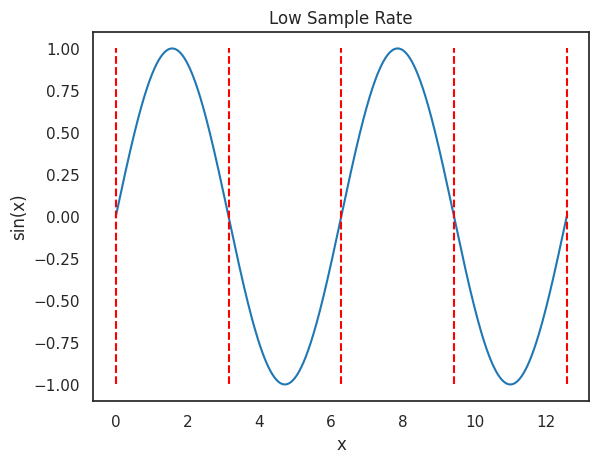

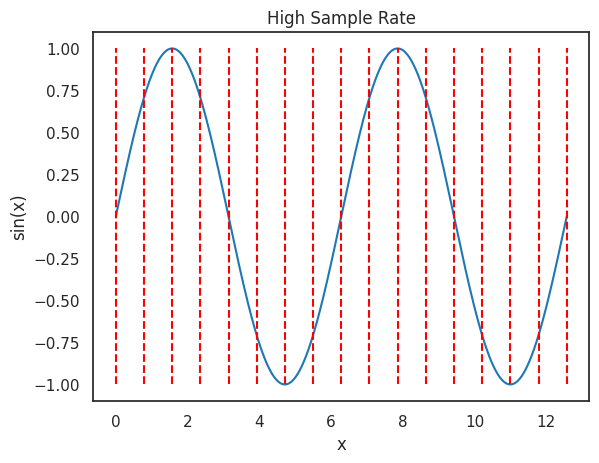

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data points for the sine wave
x = np.linspace(0, 4 * np.pi, 1000)  # Creating an array of values from 0 to 4*pi
y = np.sin(x)  # Calculating the sine values for each x

# Specify points for vertical lines
vertical_lines_x = [0 * np.pi, 1 * np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi,]

# Plot the sine wave
plt.plot(x, y, label='Sine Wave')

# Add vertical lines
for line_x in vertical_lines_x:
    plt.vlines(x=line_x, ymin=-1, ymax=1, color='r', linestyle='--', label='Vertical Line')

# Set title and labels
plt.title('Low Sample Rate')
plt.xlabel('x')
plt.ylabel('sin(x)')
# Display the plot
plt.show()

# -----------------------------------

# Specify points for vertical lines
vertical_lines_x = [0 * np.pi, 0.25 * np.pi, 0.5 * np.pi, 0.75 * np.pi,
                    1 * np.pi, 1.25 * np.pi, 1.5 * np.pi, 1.75 * np.pi,
                    2 * np.pi, 2.25 * np.pi, 2.5 * np.pi, 2.75 * np.pi,
                    3 * np.pi, 3.25 * np.pi, 3.5 * np.pi, 3.75 * np.pi,
                    4 * np.pi
                    ]

# Plot the sine wave
plt.plot(x, y, label='Sine Wave')

# Add vertical lines
for line_x in vertical_lines_x:
    plt.vlines(x=line_x, ymin=-1, ymax=1, color='r', linestyle='--', label='Vertical Line')

# Set title and labels
plt.title('High Sample Rate')
plt.xlabel('x')
plt.ylabel('sin(x)')
# Display the plot
plt.show()


# Reading, Playing, and Visualizing Audio Files

In [8]:
audio_files = glob('./ravdess-emotional-speech-audio/*/*.wav')
print(f"Total audio files: {len(audio_files)}")

Total audio files: 1440


In [9]:
# Play audio file
ipd.Audio(audio_files[10])

In [10]:
y, sr = librosa.load(audio_files[0])
#    y: Raw Audio
#   sr: Sample Rate

print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 1.6727378e-12  3.7980502e-13 -1.4610500e-12  6.4110219e-13
  9.6239835e-13 -3.3881302e-13  9.8002563e-13 -1.1181187e-12
  4.8186845e-13 -1.3618678e-12]
shape y: (75781,)
sr: 22050


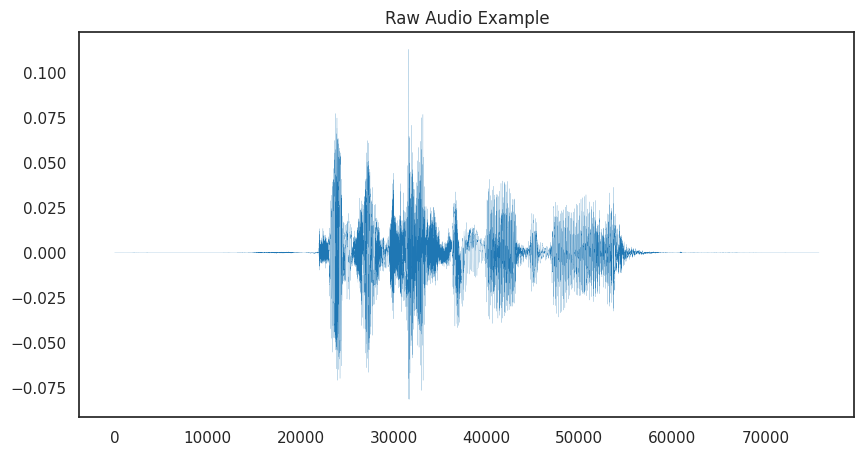

In [12]:
# Visualizing raw audio data
pd.Series(y).plot(figsize=(10, 5), lw=0.1, title='Raw Audio Example', color=color_pal[0])
plt.show()

# Trim Raw Audio Signal

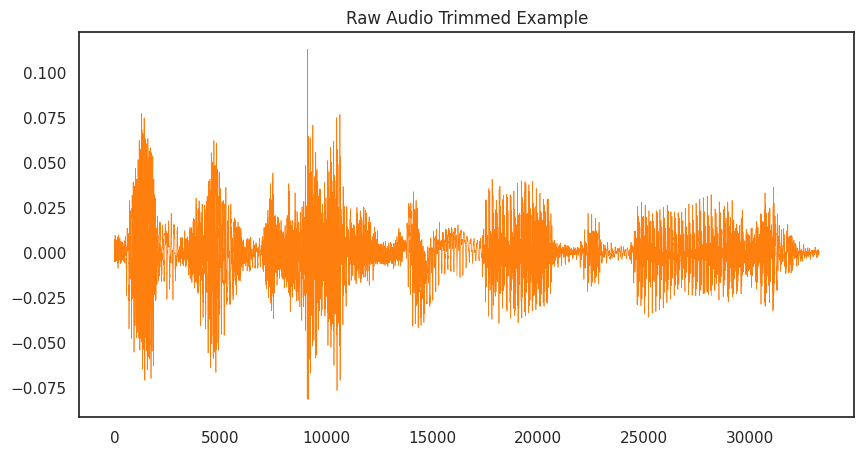

In [22]:
# Trimming Muted Audio Signal
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5), lw=0.5, title='Raw Audio Trimmed Example', color=color_pal[1])
plt.show()

# Zoom-In to Specific Part of the Signal

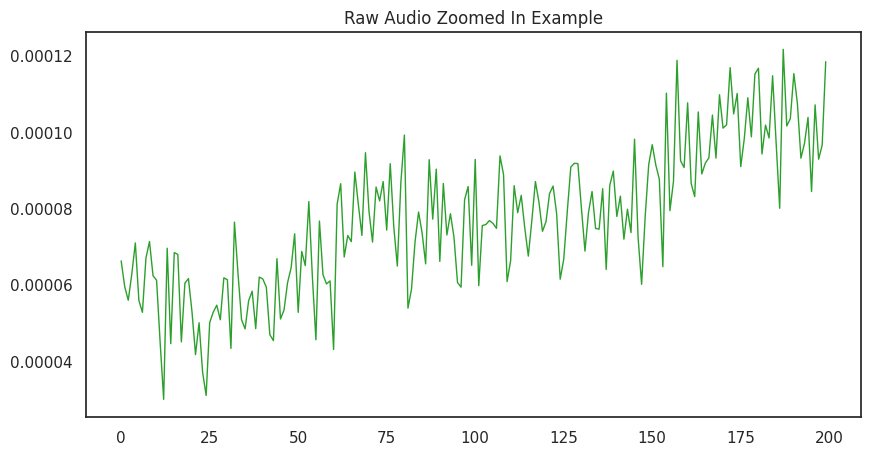

In [29]:
pd.Series(y[2000:2200]).plot(figsize=(10, 5), lw=1, title='Raw Audio Zoomed In Example', color=color_pal[2])
plt.show()

# Spectogram

# Mel Spectogram

# References

[1] https://www.kaggle.com/code/robikscube/working-with-audio-in-python/notebook

[2] https://www.youtube.com/watch?v=ZqpSb5p1xQo&list=PLjRP8EVaWyaEGh4tCGnuYle8UutS1KnJJ&index=1